## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.158369  1.132176  1.273655  1.454036  1.494184  1.287219
1  1.430305 -1.309711 -1.220159 -0.969346  0.237488 -0.596394
2  0.140525 -0.838219 -1.127784 -0.845353 -1.557288 -1.012990
3 -1.538606  0.435437  1.512783 -0.588133 -1.235044 -1.110478
4 -1.503589 -0.032439 -0.086255  0.713104 -1.295046 -1.199679


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9769380	total: 68.5ms	remaining: 1m 8s
1:	learn: 0.9692656	total: 69ms	remaining: 34.4s
2:	learn: 0.9599044	total: 69.6ms	remaining: 23.1s
3:	learn: 0.9507315	total: 70.2ms	remaining: 17.5s
4:	learn: 0.9420540	total: 70.6ms	remaining: 14.1s
5:	learn: 0.9319497	total: 71.2ms	remaining: 11.8s
6:	learn: 0.9222897	total: 71.7ms	remaining: 10.2s
7:	learn: 0.9148237	total: 72.2ms	remaining: 8.95s
8:	learn: 0.9071470	total: 72.7ms	remaining: 8s
9:	learn: 0.8982877	total: 73.1ms	remaining: 7.24s
10:	learn: 0.8914171	total: 73.7ms	remaining: 6.63s
11:	learn: 0.8834970	total: 74.2ms	remaining: 6.11s
12:	learn: 0.8746813	total: 74.8ms	remaining: 5.67s
13:	learn: 0.8680621	total: 75.2ms	remaining: 5.3s
14:	learn: 0.8612840	total: 75.7ms	remaining: 4.97s
15:	learn: 0.8542689	total: 76.2ms	remaining: 4.68s
16:	learn: 0.8461609	total: 76.6ms	remaining: 4.43s
17:	learn: 0.8388911	total: 77.1ms	remaining: 4.21s
18:	learn: 0.8304403	total: 77.5ms	remaining: 4s
1

88:	learn: 0.4749884	total: 109ms	remaining: 1.12s
89:	learn: 0.4707695	total: 110ms	remaining: 1.11s
90:	learn: 0.4676769	total: 110ms	remaining: 1.1s
91:	learn: 0.4645708	total: 111ms	remaining: 1.09s
92:	learn: 0.4613275	total: 111ms	remaining: 1.08s
93:	learn: 0.4576562	total: 112ms	remaining: 1.08s
94:	learn: 0.4543075	total: 112ms	remaining: 1.07s
95:	learn: 0.4509515	total: 113ms	remaining: 1.06s
96:	learn: 0.4477849	total: 113ms	remaining: 1.05s
97:	learn: 0.4448973	total: 114ms	remaining: 1.04s
98:	learn: 0.4418310	total: 114ms	remaining: 1.04s
99:	learn: 0.4381758	total: 115ms	remaining: 1.03s
100:	learn: 0.4349867	total: 115ms	remaining: 1.02s
101:	learn: 0.4320729	total: 116ms	remaining: 1.02s
102:	learn: 0.4286208	total: 116ms	remaining: 1.01s
103:	learn: 0.4255106	total: 117ms	remaining: 1.01s
104:	learn: 0.4222587	total: 117ms	remaining: 1000ms
105:	learn: 0.4192265	total: 118ms	remaining: 994ms
106:	learn: 0.4164320	total: 118ms	remaining: 987ms
107:	learn: 0.4137238	to

250:	learn: 0.1673013	total: 188ms	remaining: 560ms
251:	learn: 0.1667265	total: 188ms	remaining: 559ms
252:	learn: 0.1662749	total: 189ms	remaining: 557ms
253:	learn: 0.1657135	total: 189ms	remaining: 556ms
254:	learn: 0.1647918	total: 190ms	remaining: 554ms
255:	learn: 0.1641990	total: 190ms	remaining: 553ms
256:	learn: 0.1631662	total: 191ms	remaining: 551ms
257:	learn: 0.1627630	total: 191ms	remaining: 550ms
258:	learn: 0.1620982	total: 192ms	remaining: 548ms
259:	learn: 0.1616029	total: 192ms	remaining: 547ms
260:	learn: 0.1607830	total: 192ms	remaining: 545ms
261:	learn: 0.1602679	total: 193ms	remaining: 544ms
262:	learn: 0.1594884	total: 193ms	remaining: 542ms
263:	learn: 0.1588807	total: 194ms	remaining: 540ms
264:	learn: 0.1581999	total: 194ms	remaining: 538ms
265:	learn: 0.1577610	total: 194ms	remaining: 537ms
266:	learn: 0.1571907	total: 195ms	remaining: 535ms
267:	learn: 0.1568190	total: 195ms	remaining: 534ms
268:	learn: 0.1555686	total: 196ms	remaining: 532ms
269:	learn: 

469:	learn: 0.0654867	total: 293ms	remaining: 330ms
470:	learn: 0.0651628	total: 293ms	remaining: 330ms
471:	learn: 0.0648346	total: 294ms	remaining: 329ms
472:	learn: 0.0647729	total: 294ms	remaining: 328ms
473:	learn: 0.0643816	total: 295ms	remaining: 327ms
474:	learn: 0.0640585	total: 295ms	remaining: 326ms
475:	learn: 0.0637582	total: 296ms	remaining: 326ms
476:	learn: 0.0634435	total: 296ms	remaining: 325ms
477:	learn: 0.0631526	total: 297ms	remaining: 324ms
478:	learn: 0.0627806	total: 298ms	remaining: 324ms
479:	learn: 0.0624966	total: 298ms	remaining: 323ms
480:	learn: 0.0621957	total: 299ms	remaining: 322ms
481:	learn: 0.0618347	total: 299ms	remaining: 322ms
482:	learn: 0.0615575	total: 300ms	remaining: 321ms
483:	learn: 0.0612049	total: 300ms	remaining: 320ms
484:	learn: 0.0609342	total: 300ms	remaining: 319ms
485:	learn: 0.0606440	total: 301ms	remaining: 318ms
486:	learn: 0.0603791	total: 301ms	remaining: 317ms
487:	learn: 0.0600100	total: 302ms	remaining: 317ms
488:	learn: 

634:	learn: 0.0261801	total: 371ms	remaining: 214ms
635:	learn: 0.0260693	total: 372ms	remaining: 213ms
636:	learn: 0.0259179	total: 373ms	remaining: 212ms
637:	learn: 0.0258542	total: 373ms	remaining: 212ms
638:	learn: 0.0256851	total: 374ms	remaining: 211ms
639:	learn: 0.0255195	total: 374ms	remaining: 210ms
640:	learn: 0.0254106	total: 375ms	remaining: 210ms
641:	learn: 0.0253130	total: 375ms	remaining: 209ms
642:	learn: 0.0252519	total: 376ms	remaining: 209ms
643:	learn: 0.0250912	total: 376ms	remaining: 208ms
644:	learn: 0.0249340	total: 377ms	remaining: 207ms
645:	learn: 0.0248099	total: 377ms	remaining: 207ms
646:	learn: 0.0246671	total: 378ms	remaining: 206ms
647:	learn: 0.0245640	total: 378ms	remaining: 205ms
648:	learn: 0.0244608	total: 379ms	remaining: 205ms
649:	learn: 0.0243736	total: 379ms	remaining: 204ms
650:	learn: 0.0242358	total: 380ms	remaining: 204ms
651:	learn: 0.0241362	total: 380ms	remaining: 203ms
652:	learn: 0.0240380	total: 381ms	remaining: 202ms
653:	learn: 

857:	learn: 0.0123321	total: 477ms	remaining: 79ms
858:	learn: 0.0122723	total: 478ms	remaining: 78.4ms
859:	learn: 0.0122630	total: 478ms	remaining: 77.8ms
860:	learn: 0.0122313	total: 479ms	remaining: 77.3ms
861:	learn: 0.0122222	total: 479ms	remaining: 76.7ms
862:	learn: 0.0121846	total: 479ms	remaining: 76.1ms
863:	learn: 0.0121583	total: 480ms	remaining: 75.5ms
864:	learn: 0.0121274	total: 480ms	remaining: 74.9ms
865:	learn: 0.0120681	total: 480ms	remaining: 74.3ms
866:	learn: 0.0120059	total: 481ms	remaining: 73.8ms
867:	learn: 0.0119972	total: 481ms	remaining: 73.2ms
868:	learn: 0.0119365	total: 482ms	remaining: 72.6ms
869:	learn: 0.0118903	total: 482ms	remaining: 72ms
870:	learn: 0.0118387	total: 483ms	remaining: 71.5ms
871:	learn: 0.0118031	total: 484ms	remaining: 71ms
872:	learn: 0.0117767	total: 484ms	remaining: 70.4ms
873:	learn: 0.0117240	total: 485ms	remaining: 69.9ms
874:	learn: 0.0117150	total: 485ms	remaining: 69.3ms
875:	learn: 0.0116899	total: 486ms	remaining: 68.7ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

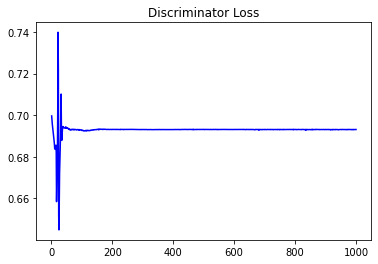

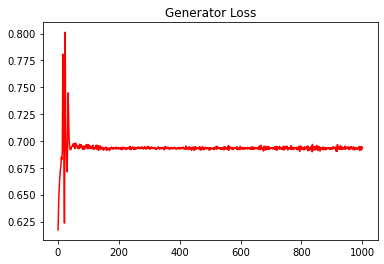

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21234276693436532


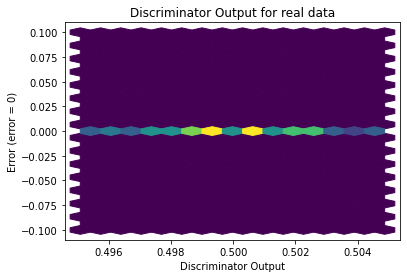

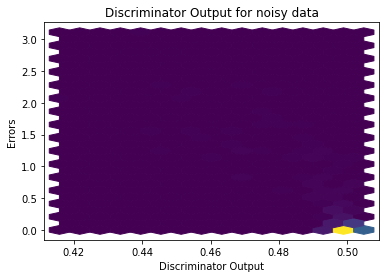

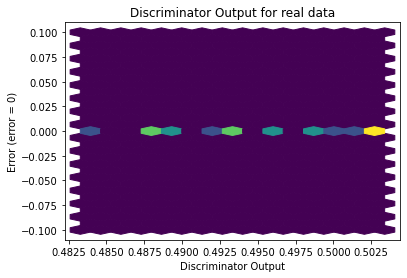

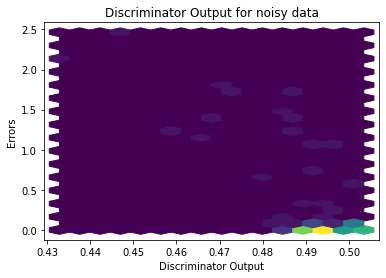

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


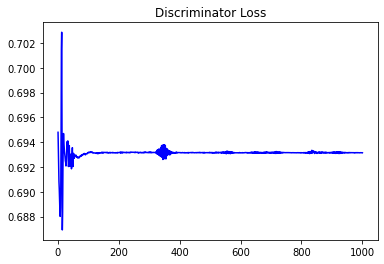

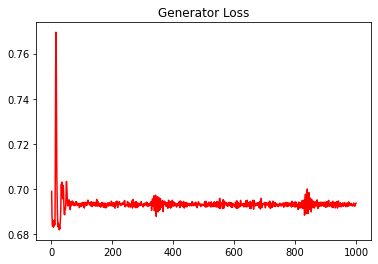

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.24886293448107064


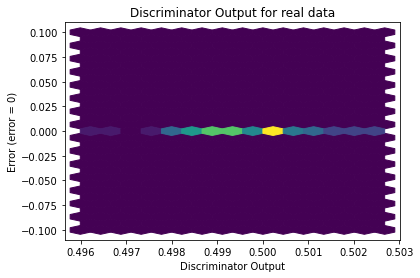

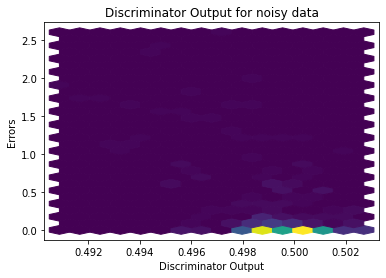

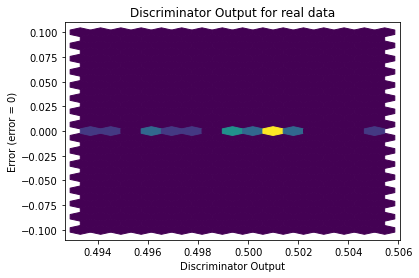

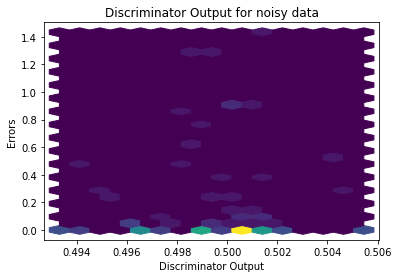

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2496]], requires_grad=True)
